# Installing and loading packages

>First step will be to install and load some packages that we will be using for the manipulation of our data. It includes pandas, numpy and math for data cleaning and manipulation and we will be using **mplsoccer** to finally plot our pitches and the data. mplsoccer has tons of helpful functions that open up a world of data visualisation for you.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch, add_image, FontManager
from matplotlib.colors import LinearSegmentedColormap
import math
import ipywidgets as widgets
from highlight_text import  ax_text, fig_text
import matplotlib.patches as patches
import warnings
from pandas.core.common import SettingWithCopyWarning
from IPython.display import display, Math, Latex


warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# Loading and cleaning the data

This step is arguably the most important step when working with anyform of data. In here we will be looking at what we have and then cleaning it so as to make it serve our purpose with ease. Here you will see how to create new columns in an existing dataframe, draw some meaningful insights using groupby function etc.

We will first load up and look at our data.
df.head(n) allows you to view the first n rows of your dataframe.

In [4]:
df = pd.read_csv(r"WSL_20-21_Pass_and_Carry_tutorial.csv", low_memory=False)
df.head()

,id,index,period,timestamp,minute,second,possession,duration,related_events,location,...,DefendersInCone,InCone.GK,DefArea,distance.ToD1.360,distance.ToD2.360,milliseconds,ElapsedTime,StartOfPossession,TimeInPoss,TimeToPossEnd
0,3f5dde74-d91b-44ea-9a1f-88e84da555ab,1,1,00:00:00.000,0,0,1,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0.000,0.000,0.0,0.000
1,e4fefe61-4e08-47e0-be4d-2276388e6eb4,2,1,00:00:00.000,0,0,1,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0.000,0.000,0.0,0.000
2,ff9a99d3-3efd-45c2-8736-a8a93dd02638,3,1,00:00:00.000,0,0,1,0.000000,5fb7026c-83aa-4490-96b1-a55825c4dcb8,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0.000,0.000,0.0,0.000
3,5fb7026c-83aa-4490-96b1-a55825c4dcb8,4,1,00:00:00.000,0,0,1,0.000000,ff9a99d3-3efd-45c2-8736-a8a93dd02638,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0.000,0.000,0.0,0.000
4,8a29c8bc-df2e-4467-8ca3-2ea98574581c,5,1,00:00:00.218,0,0,2,1.167717,4fdedcf7-587a-48cb-a46e-bc4804317114,"c(61, 40.1)",...,NaN,NaN,NaN,NaN,NaN,218,0.218,0.218,0.0,14.383



The distances have been calculated using Euclidean Distance Formula $\sqrt {\left( {x_1 - x_2 } \right)^2 + \left( {y_1 - y_2 } \right)^2}$ where (x1,y1) are the coordinates of the starting location and (x2, y2) are the coordinates of the end location.

Statsbomb provides the end location of carries in a separate column so we can calculate the distance of end points of passes and carries separately.

In [5]:
df['initialDistancefromgoal'] = np.sqrt(((120 - df['location.x'])**2) + ((40 - df['location.y'])**2))
df['finalDistancefromgoal'] = np.sqrt(((120 - df['pass.end_location.x'])**2) + ((40 - df['pass.end_location.y'])**2))


df['finalDistancefromgoalcarry'] = np.sqrt(((120 - df['carry.end_location.x'])**2) + ((40 - df['carry.end_location.y'])**2))

In [6]:
df['deepCompletion'] = np.where(((df['finalDistancefromgoal'] <= (21.87)) & (df['initialDistancefromgoal'] >= (21.87)) | ((df['finalDistancefromgoalcarry'] <= (21.87)) & (df['initialDistancefromgoal'] >= (21.87)))), 'True', 'False')

df.head()

,id,index,period,timestamp,minute,second,possession,duration,related_events,location,...,distance.ToD2.360,milliseconds,ElapsedTime,StartOfPossession,TimeInPoss,TimeToPossEnd,initialDistancefromgoal,finalDistancefromgoal,finalDistancefromgoalcarry,deepCompletion
0,3f5dde74-d91b-44ea-9a1f-88e84da555ab,1,1,00:00:00.000,0,0,1,0.000000,NaN,NaN,...,NaN,0,0.000,0.000,0.0,0.000,NaN,NaN,NaN,False
1,e4fefe61-4e08-47e0-be4d-2276388e6eb4,2,1,00:00:00.000,0,0,1,0.000000,NaN,NaN,...,NaN,0,0.000,0.000,0.0,0.000,NaN,NaN,NaN,False
2,ff9a99d3-3efd-45c2-8736-a8a93dd02638,3,1,00:00:00.000,0,0,1,0.000000,5fb7026c-83aa-4490-96b1-a55825c4dcb8,NaN,...,NaN,0,0.000,0.000,0.0,0.000,NaN,NaN,NaN,False
3,5fb7026c-83aa-4490-96b1-a55825c4dcb8,4,1,00:00:00.000,0,0,1,0.000000,ff9a99d3-3efd-45c2-8736-a8a93dd02638,NaN,...,NaN,0,0.000,0.000,0.0,0.000,NaN,NaN,NaN,False
4,8a29c8bc-df2e-4467-8ca3-2ea98574581c,5,1,00:00:00.218,0,0,2,1.167717,4fdedcf7-587a-48cb-a46e-bc4804317114,"c(61, 40.1)",...,NaN,218,0.218,0.218,0.0,14.383,59.000085,81.797861,NaN,False


## Groupby and some more filtering

The next step would be to eliminate the entries from corner situation because this would skew the data in favor of the corner takers. We will also only consider successful passes.

Following this we get to groupby, which is a key function that allows us to aggregate our data and look at the leaderboards in various categories.

In [7]:
deepcompletion = df.loc[(df['play_pattern.name']!='From Corner') & (((df['deepCompletion']=='True') & (df['pass.outcome.name']!='Incomplete')))]

dc_list = deepcompletion.groupby(['player.name','team.name']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending = False).reset_index()
del dc_list['index']
dc_list.head(10)

,player.name,team.name,count
0,Chloe Kelly,Manchester City WFC,105
1,Vivianne Miedema,Arsenal WFC,90
2,Francesca Kirby,Chelsea FCW,76
3,Ebony Salmon,Bristol City WFC,69
4,Katie McCabe,Arsenal WFC,68
5,Bethany Mead,Arsenal WFC,68
6,Samantha May Kerr,Chelsea FCW,60
7,Pernille Mosegaard Harder,Chelsea FCW,58
8,Lauren Hemp,Manchester City WFC,53
9,Nicoline Sørensen,Everton LFC,48


We can play around and select players from out dataframe by creating a dropdown list of all the names in our dataframe. This can come in handy when creating an interactive dashboard.

In [8]:
options = df["player.name"].unique()
options = options.tolist()

options = [x for x in options if str(x) != 'nan']
playerlist = widgets.Combobox(
    placeholder='Enter a name',
    options=options,
    description='Player:',
    ensure_option=True,
    disabled=False
)
playerlist

Combobox(value='', description='Player:', ensure_option=True, options=('Angela Addison', 'Kerys Harrop', 'Kit …

In [10]:
player = playerlist.value

# Plotting the data

We can now get to the real nice stuff i.e. plotting our data onto the pitch. This is where mplsoccer makes our life so much easier because you don't have to create your own pitches (something that you can do and probably should try it once just as an excercise and to understand some more functions). mplsoccer also provides us with enough customizations on top of matplotlib that should be more than sufficient to get you started

In [11]:
#I like to keep my color palette and some constants in one place so I can change things here and then it's applied
#everywhere.

pitchColor = "white"
lineColor = "#070707"
passColor = "#636669"
faceColor = pitchColor
passColor = '#3371AC'
carryColor = '#DC2228'

radius = 21.87 #radius of the penalty box to draw the arc

findfont: Font family ['Century Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Century Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Century Gothic'] not found. Falling back to DejaVu Sans.


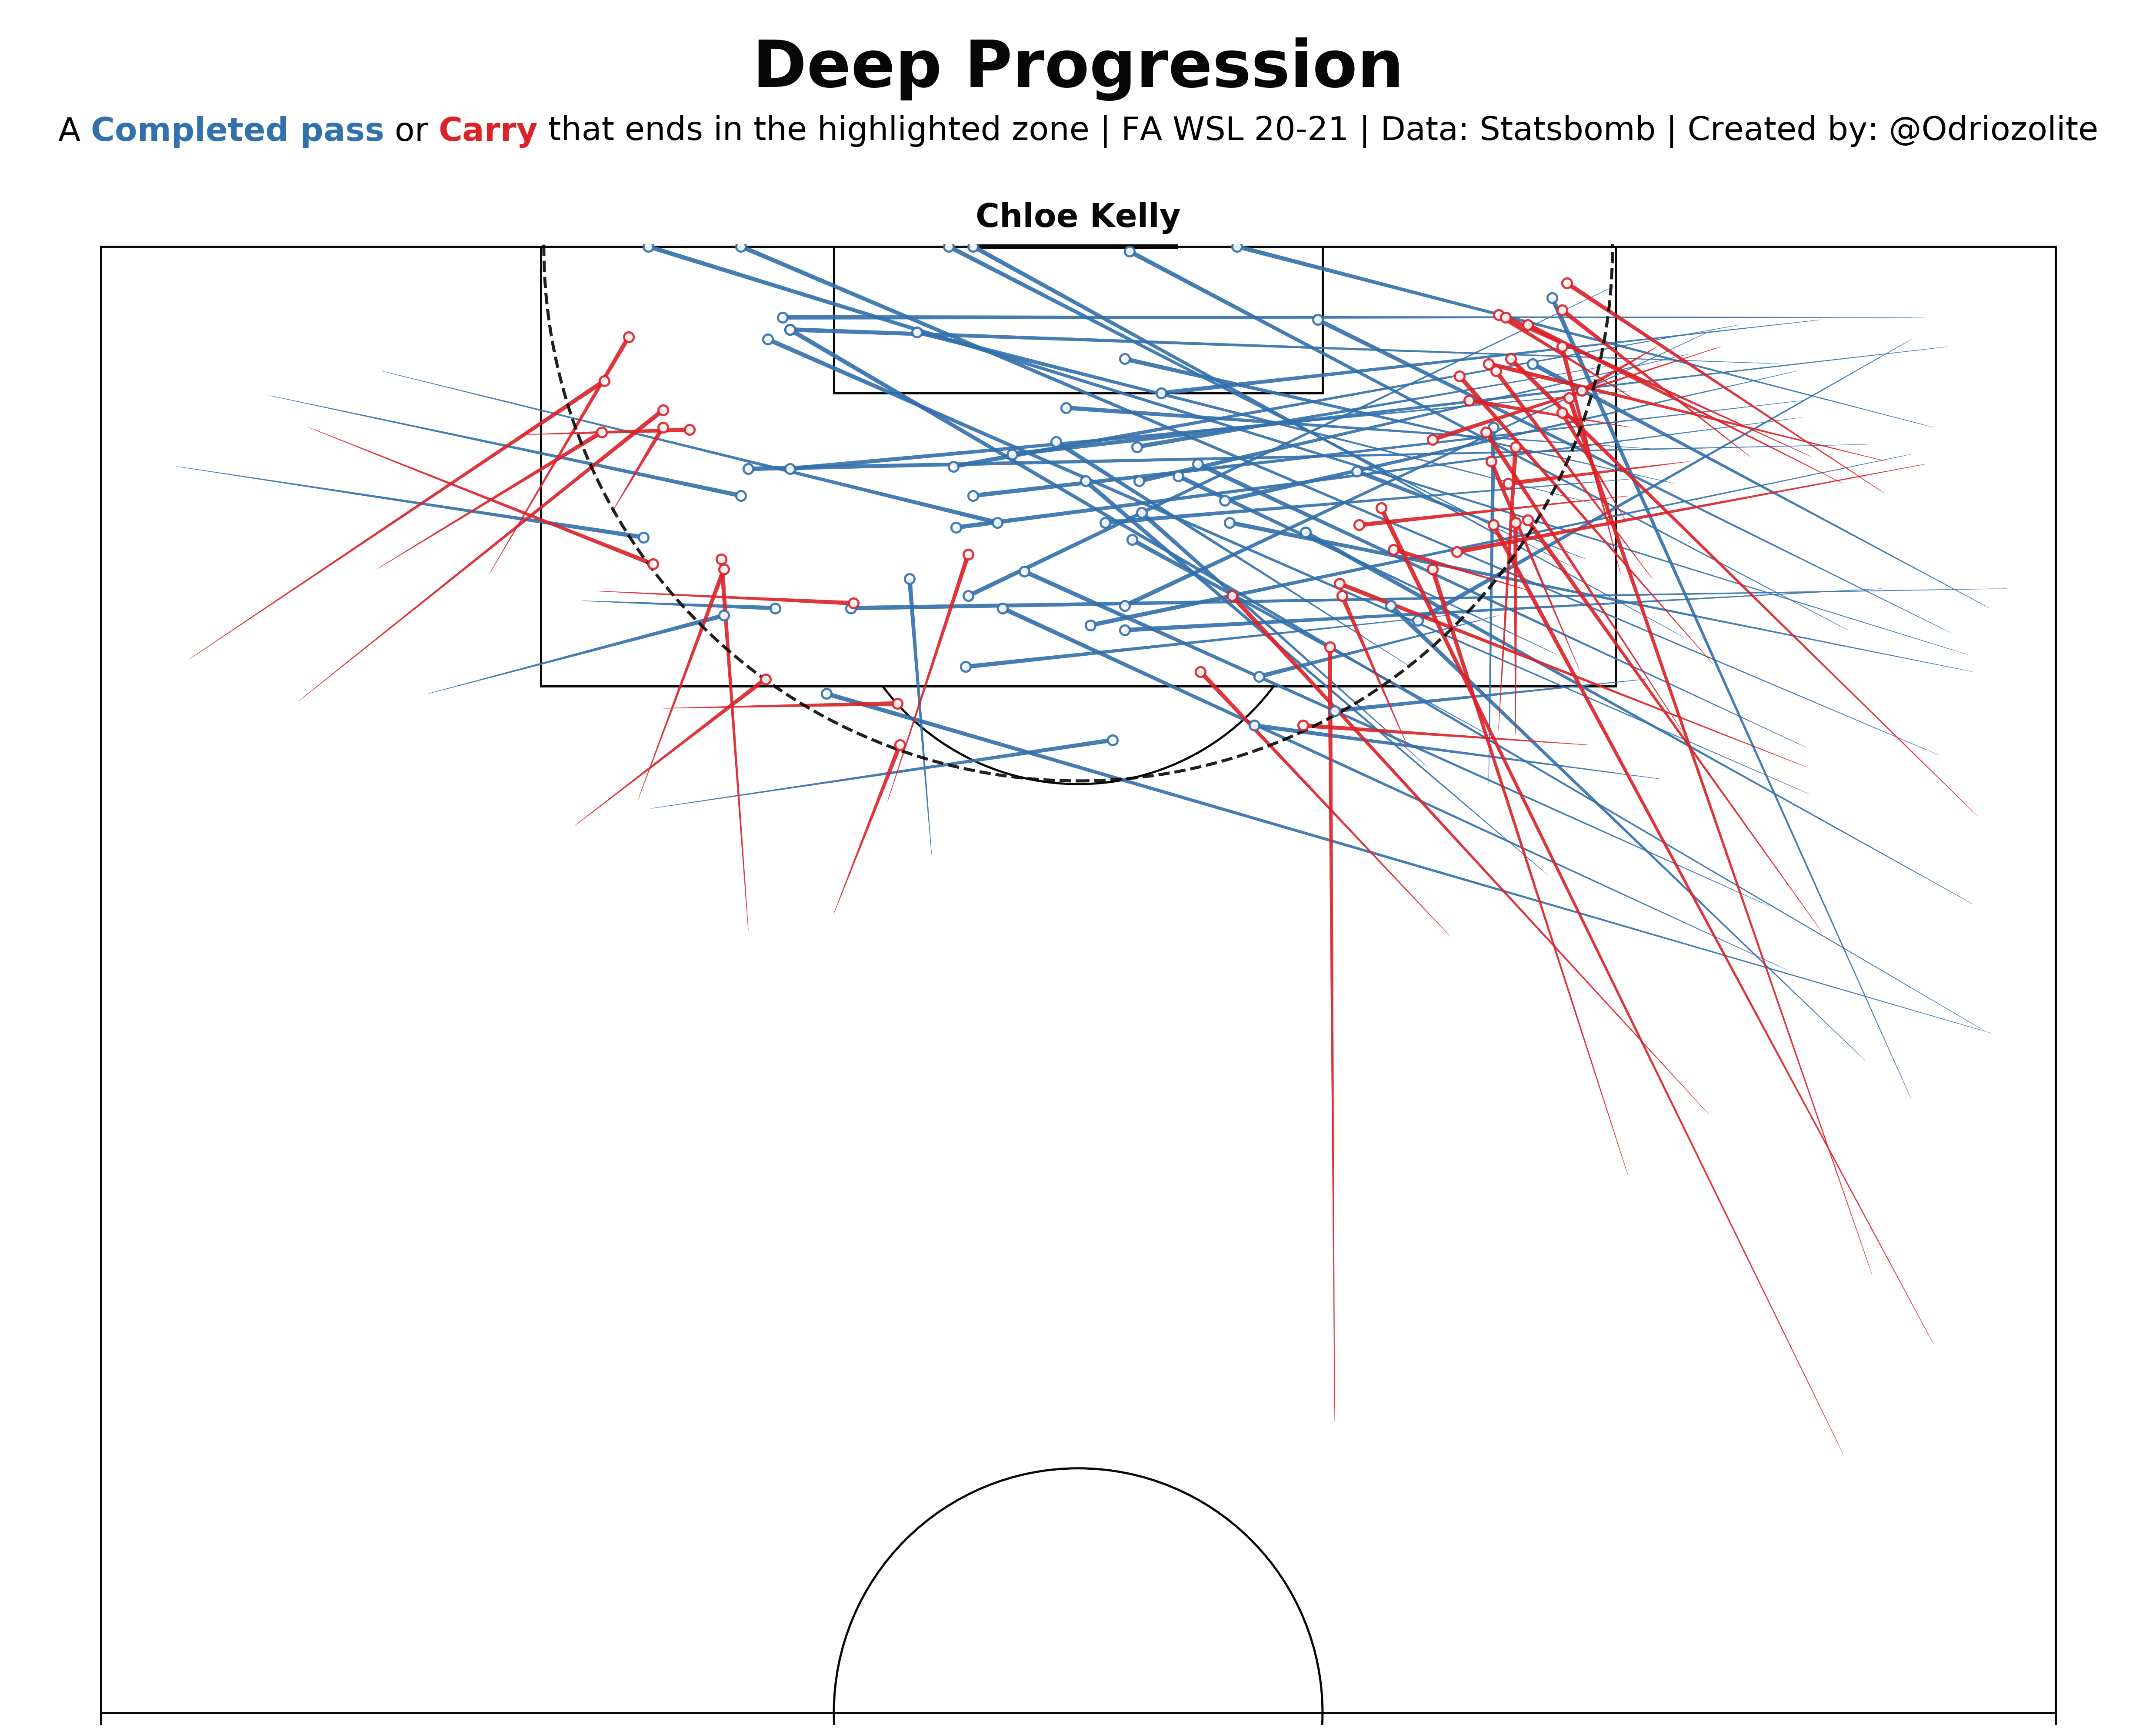

In [12]:
#Plotting the pitch

pitch = VerticalPitch(pitch_type='statsbomb', figsize = (16,14),pad_top=0.1, pad_bottom=0.5,
                  pitch_color=pitchColor, line_color=lineColor,half = True,
                  constrained_layout=True, tight_layout=True, line_zorder=1, linewidth=5, spot_scale=0.00)

fig, ax = pitch.grid(nrows=1, ncols=1, figheight=55,
                      endnote_height=0.0, endnote_space=0, axis=False,
                      title_height=0.13, grid_height=0.86, space=0.11)

fig.set_facecolor(pitchColor)

#Title of our plot

fig.suptitle("Deep Progression", fontsize=150, color='#070707',
            fontfamily = "Century Gothic", fontweight = "bold",y=0.98)


highlight_textprops =\
    [{"color": "#3371AC","fontweight": 'bold'},
     {"color": "#DC2228","fontweight": 'bold'}
    ]

Title = fig_text(s = "A <Completed pass> or <Carry> that ends in the highlighted zone | FA WSL 20-21 | Data: Statsbomb | Created by: @Odriozolite",
        x = 0.5, y = 0.935, highlight_textprops = highlight_textprops ,
        fontfamily = "Century Gothic",fontweight='regular', ha='center',fontsize=75);


#The plotting of the area of focus for our plot. This is one of the aesthetic element that if you don't like you can ignore.
#We will be drawing a semicircle centered at the mid-point of the goal with a diameter equal to the width of the penalty box.
#The important stylistic arguments here are linestyle, I have gone with a dashed line instead of a solid one, more on this
#can be found out in Matplotlib docs which I highly recommend you check out.

#Zorder is basically layering different elements of our viz on top of one another, so we want our semi-circle to be plotted
#as the third layer from the bottom. 

circle = patches.Circle([40,120],radius = radius , linewidth = 7, linestyle='--',
                  edgecolor='#070707', facecolor='none', alpha=0.9, zorder=3 )
ax['pitch'].add_patch(circle)


#Defining out plotting function

def plot_DC(df, player):
    df = df[(df['player.name'] == player)]
    
    
    ax['pitch'].set_title(str(player) , fontsize=75, color=lineColor,
                  fontfamily = "Century Gothic", fontweight = 'bold', va="center", ha="center", pad=60)
    
    #Plotting the passes. The scatter point at the end of the the lines is a stylistic choice and you can do it without it.
    #The syntax is very intuitive and you can control various parameters of the lines by controlling different arguments.
    
    pitch.lines(df['location.x'], df['location.y'], df['pass.end_location.x'], df['pass.end_location.y'], 
                ax=ax['pitch'],comet = True, color= passColor, lw=10, alpha = 0.7)
    pitch.scatter(df['pass.end_location.x'], df['pass.end_location.y'], edgecolors= passColor, c=pitchColor,
          s = 500, zorder=4, ax=ax['pitch'], marker = 'o', alpha = 0.9,linewidths=5)
    
    #plotting the carries

    pitch.lines(df['location.x'], df['location.y'], df['carry.end_location.x'], df['carry.end_location.y'],
                ax=ax['pitch'],comet = True, color= carryColor, lw=10, alpha = 0.7)
    pitch.scatter(df['carry.end_location.x'], df['carry.end_location.y'], edgecolors= carryColor, c=pitchColor,
          s = 500, zorder=5, ax=ax['pitch'], marker = 'o', alpha = 0.9,linewidths=5)
    
plot_DC(df = deepcompletion, player=player) 

## The above code is previously taken from a guest blog from Yash. 
Below we will look to now prep our dataset to create the above design but within Tableau! The below code is new for the Tableau tutorial.

In [13]:
player

'Chloe Kelly'

In [14]:
#Reduce dataset to just our chosen player and only take the deepcompletions
df1 = df[(df['player.name'] == player)]
df1 = df1[(df1['deepCompletion'] == 'True')]
df1 = df1[(df1['play_pattern.name']!='From Corner')]
df1 = df1[(df1['pass.outcome.name']!='Incomplete')]

df1.head(5)

,id,index,period,timestamp,minute,second,possession,duration,related_events,location,...,distance.ToD2.360,milliseconds,ElapsedTime,StartOfPossession,TimeInPoss,TimeToPossEnd,initialDistancefromgoal,finalDistancefromgoal,finalDistancefromgoalcarry,deepCompletion
13667,45b6e75f-01ac-4de0-8d25-452259ce905f,14,1,00:00:09.818,0,9,2,1.579466,"c(""1767621c-7c3e-4839-9b30-a24245551b9c"", ""2d5...","c(106.8, 11.3)",...,NaN,818,9.818,0.407,9.411,5.328,31.590030,NaN,20.928688,True
13822,1a8cdcc7-fd42-408c-b57f-65a1e694df4b,169,1,00:03:12.070,3,12,10,0.102119,"c(""5299e254-9d69-4ead-a4aa-9996179645b2"", ""ed5...","c(109.1, 20.9)",...,NaN,70,192.070,172.567,19.503,59.247,21.991362,NaN,18.540766,True
15241,c8d3da54-47d9-4e11-ba08-034e7af5d36c,1588,1,00:37:40.943,37,40,78,0.736735,"c(""4409bed6-5d9c-486a-aa4d-7e5735b47c43"", ""982...","c(92.7, 30)",...,NaN,943,2260.943,2255.145,5.798,0.737,29.073871,NaN,21.666795,True
16844,16cc0b84-8246-4cbb-a188-28344372eab4,3191,2,00:33:48.682,78,48,162,1.265445,eea1b649-3c45-4ff4-b6f0-0aa57d55493a,"c(98.2, 63.9)",...,NaN,682,4735.707,4698.640,37.067,2.290,32.348879,20.880613,NaN,True
17263,f52d024f-020b-45b0-a286-7d9fde4473a5,3610,2,00:44:14.224,89,14,180,3.364424,8def7bb1-f923-4780-94a8-a8823fc9a068,"c(97.6, 69.9)",...,NaN,224,5361.249,5314.547,46.702,6.964,37.360005,13.256319,NaN,True


In [16]:
#Pick specific columns from the dataset that we want to carry through 
df1 = df1[["id", "index", "match_id", "competition_id", "season_id", "period", "timestamp", "minute", "second", 
"duration", "under_pressure", "type.name", "play_pattern.name", "possession_team.name", "team.name", "player.name",
"pass.length", "pass.recipient.name", "pass.height.name", "pass.outcome.name", "location.x", "location.y",
"pass.end_location.y", "pass.end_location.x", "carry.end_location.y", "carry.end_location.x", "deepCompletion"
]]

In [17]:
#Rename usable columns for Tableau
df1.rename(columns={'location.x': 'Start_X', 'location.y': 'Start_Y' }, inplace=True)

In [19]:
df2=df1

In [20]:
df2.rename(columns={'pass.end_location.x': 'Pass_X', 'carry.end_location.x': 'Carry_X' }, inplace=True)
df2.rename(columns={'pass.end_location.y': 'Pass_Y', 'carry.end_location.y': 'Carry_Y' }, inplace=True)

In [21]:
#
df2['End_X'] = df2.Pass_X.combine_first(df2.Carry_X)
df2['End_Y'] = df2.Pass_Y.combine_first(df2.Carry_Y)